In [308]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

read images

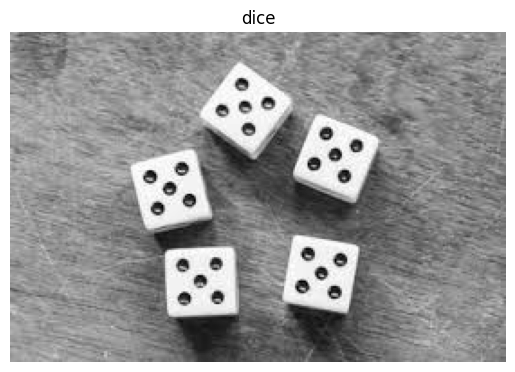

In [309]:
number = 1
image_org = cv2.imread(f'input/dice{number}.png')
image_dice = cv2.cvtColor(image_org, cv2.COLOR_BGR2GRAY)
plt.imshow(image_dice, cmap='gray')
plt.title('dice')
plt.axis('off')
plt.show()

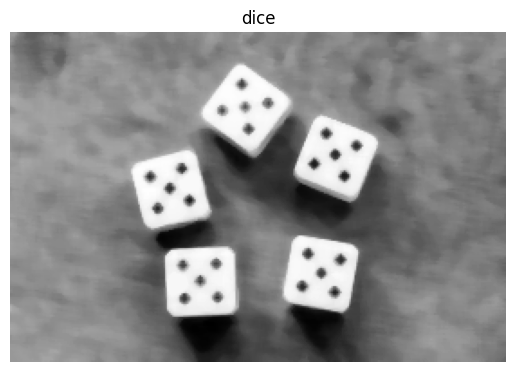

In [310]:
image_Blur = cv2.medianBlur(image_dice, 7)
plt.imshow(image_Blur, cmap='gray')
plt.title('dice')
plt.axis('off')
plt.show()

In [311]:
# # 1. Edge detection filter
# kernel = np.array([[-1 , -1 , -1],
#                    [-1 ,  8 , -1],
#                    [-1 , -1 , -1]])

# image_edge = cv2.filter2D(image_dice, -1, kernel)
# plt.imshow(image_edge, cmap='gray')
# plt.title('dice edge')
# plt.axis('off')
# plt.show()


In [312]:
# hist = cv2.calcHist([image_dice], [0], None, [256], [0, 256])
# plt.plot(hist)
# plt.show()

In [313]:
# claheFilter = cv2.createCLAHE(clipLimit=4, tileGridSize=(40, 40))
# image_dice_Blur2 = claheFilter.apply(image_Blur)
# plt.imshow(image_dice_Blur2, cmap='gray')
# plt.axis('off')
# plt.show()
# # hist = cv2.calcHist([image_dice2], [0], None, [256], [0, 256])
# # plt.plot(hist)
# # plt.show()

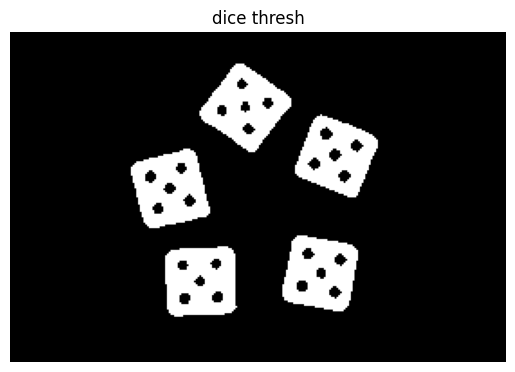

In [314]:
_, image_thresh = cv2.threshold(image_Blur, 180, 255, cv2.THRESH_BINARY)

plt.imshow(image_thresh, cmap='gray')
plt.title('dice thresh')
plt.axis('off')
plt.show()

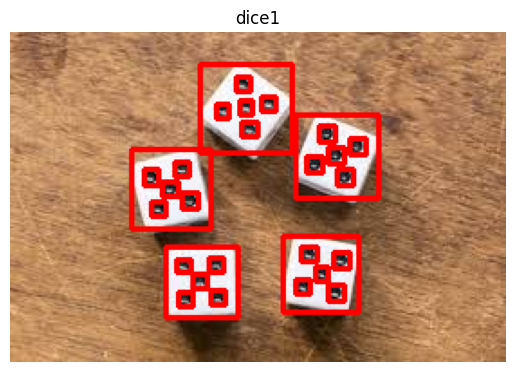

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [315]:
contours, hierarch = cv2.findContours(image_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

result = image_org.copy()
true_hierarch_index = []
for i in range(len(contours)):
    x, y, w, h = cv2.boundingRect(contours[i])
    if 5 < w < result.shape[0]//2 and 5 < h < result.shape[1]//2:
        cv2.rectangle(result, (x,y), (x+w, y+h), (0, 0, 255), 2)
        true_hierarch_index.append(i)
        # print(f'{i}, w: {w} , h: {h} , {hierarch[0][i]}')

plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title(f'dice{number}')
plt.axis('off')
plt.show()
true_hierarch_index